#1. Comportamiento del cliente- Walmart

Este dataset está diseñado para analizar y entender el comportamiento de compras de los clientes, con el objetivo de identificar patrones, tendencias y segmentación claves. Puede ser útil para mejorar estrategias de marketing, optimizar inventarios y personalizar experiencia del cliente

# 2. Descripción de las Variables
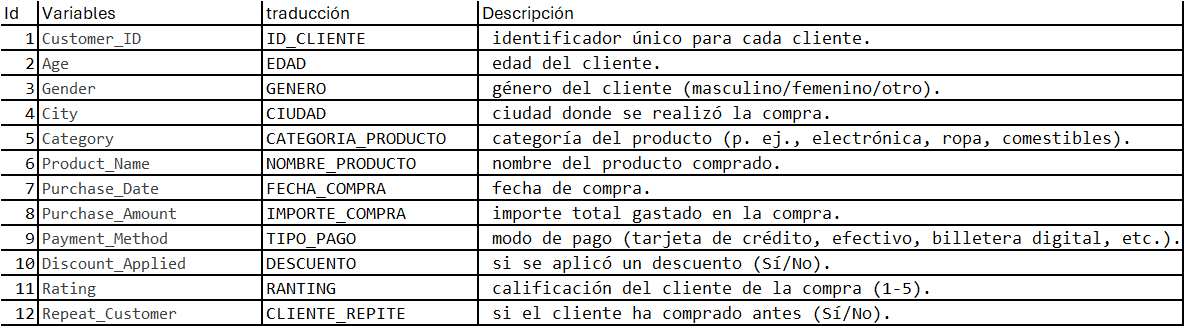

#3. Librerias a utilizar :
   
*  Calidad de los datos: pandas y numpy
*  Visualizacion: matplotlib y searborn




In [46]:
# librerias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

##3.1 Cargar el archivo de google colab

In [47]:
# Cargar archivos de google colab
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


##3.2 Crear la ruta y cargar el archivo csv con read_csv pandas

In [48]:
# Crear una variable que se llame ruta
# abrir el archivo con el metodo pd.read_csv()
# llamo los 10 primeros registros
ruta = "/content/drive/MyDrive/Comportamiento de compra/Walmart_customer_purchases.csv"
dato= pd.read_csv(ruta)
dato.head()

,Customer_ID,Age,Gender,City,Category,Product_Name,Purchase_Date,Purchase_Amount,Payment_Method,Discount_Applied,Rating,Repeat_Customer
0,84607c1f-910c-44d5-b89f-e1ee06dd34c0,49,Female,New Cynthia,Electronics,Smartphone,2024-08-30,253.26,Cash on Delivery,No,1,Yes
1,f2a81712-a73e-4424-8b39-4c615a0bd4ea,36,Other,Cruzport,Clothing,T-Shirt,2024-12-21,73.19,Debit Card,Yes,1,No
2,da9be287-8b0e-4688-bccd-1a2cdd7567c6,52,Male,Jeffreytown,Beauty,Perfume,2024-12-26,125.62,Credit Card,Yes,1,No
3,50ec6932-3ac7-492f-9e55-4b148212f302,47,Female,Jenniferburgh,Electronics,Smartwatch,2024-11-04,450.32,Credit Card,No,2,Yes
4,8fdc3098-fc75-4b0f-983c-d8d8168c6362,43,Other,Kingshire,Electronics,Smartphone,2024-10-07,369.28,Credit Card,Yes,2,Yes


#4. Exploracion de los datos:
revision de la estructura de los datos

##4.1 Preparacion de los datos

### 4.1.1 Limpieza de los datos

###4.1.1.1 identificar el tipo de datos, valores nulos, duplicidad, cantidad de registros de las variables,número de variables

In [49]:
### Generar una tabla que muestre, la variable, el tipo de datos, cantidad de registros, valores nulos, y un ejemplo
def analizar_dataframe(df):
    # Identificar el tipo de variables y valores faltantes
    unique = []
    dtyp = []
    vnull = []
    cantregis=[]


    for col in df:
        unique.append(df[col].unique()[0])
        dtyp.append(df[col].dtype)
        vnull.append(df[col].isnull().sum())
        cantregis.append(df[col].shape[0])


    result_trans = pd.DataFrame({
        "Columnas": df.columns,
        "cantidad de registros": cantregis,
        "Tipo de Datos": dtyp,
        "Valores Nulos": vnull,
        "Valor Único": unique


    })

    cantidad_columnas = df.shape[1]
    cantidad_registros = df.shape[0]
    duplicados = df.duplicated().sum()

    print(f'Cantidad de Columnas: {cantidad_columnas}')
    print(f'Valores Duplicados: {duplicados}')

    print('\n')


    return result_trans

In [50]:
# utilizar la función
analizar_dataframe(dato)

Cantidad de Columnas: 12
Valores Duplicados: 0




,Columnas,cantidad de registros,Tipo de Datos,Valores Nulos,Valor Único
0,Customer_ID,50000,object,0,84607c1f-910c-44d5-b89f-e1ee06dd34c0
1,Age,50000,int64,0,49
2,Gender,50000,object,0,Female
3,City,50000,object,0,New Cynthia
4,Category,50000,object,0,Electronics
5,Product_Name,50000,object,0,Smartphone
6,Purchase_Date,50000,object,0,2024-08-30
7,Purchase_Amount,50000,float64,0,253.26
8,Payment_Method,50000,object,0,Cash on Delivery
9,Discount_Applied,50000,object,0,No


####Interpretación de las variables:
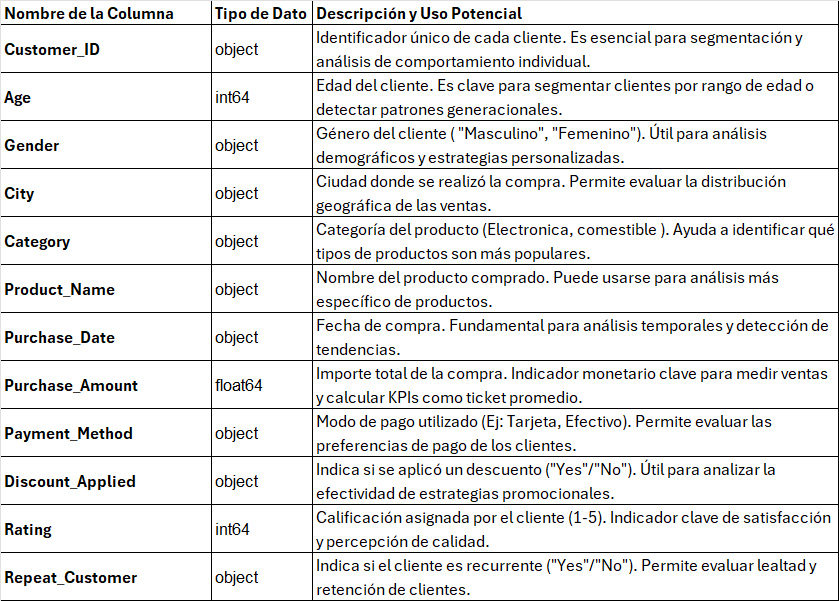


####Observación:
Cantidad de Columnas: 12 columna/variables

Cantidad de Registros: Contiene un total de 50,000 registros

Valores Duplicados: No presenta valores duplicados. Asegurando la unicidad de los registros, lo que es fundamental para mantener la integridad de los datos y evitar inconsistencias en el análisis.

Variable "Purchase_date" (fecha de compra) se debe comvertir a tipo de dato: date, con el fin de tener un mejor analisis para tendencia.







Nota otros metodos que puedes utilizar para ver el numero de filas y columnas es shape() y para obtener informacion de los valores nulos por columna y el tipo de datos, con el metodo info()


tambien se puede usar los metodos shape() y info()

###4.1.1.2 Estadísticas básicas

In [51]:
# determinar Estadísticas básicas para el tipo de datos numericos:
dato.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,50000.0,38.94522,12.398137,18.00,28.00,39.000,50.0000,60.00
Purchase_Amount,50000.0,255.53223,141.574416,10.01,133.05,255.045,378.9125,499.99
Rating,50000.0,2.99868,1.417956,1.00,2.00,3.000,4.0000,5.00


###Observaciones sobre las Estadísticas Básicas:
    1.	Columna Age (Edad del cliente):
          Rango de Edad: Los valores oscilan entre 18 años y 60 años, lo que indica que la base de datos incluye tanto clientes jóvenes como maduros.
          Distribución General: La mediana es de 39 años, lo que sugiere que la mayoría de los clientes se encuentra en un rango adulto.
          Desviación Estándar: La variabilidad en las edades es moderada (12.39), indicando que hay una distribución razonablemente amplia entre los diferentes grupos etarios.
    2.	Columna Purchase_Amount (Monto de Compra):
          Rango de Gastos: Los valores fluctúan desde compras pequeñas de $10.01 hasta un máximo de $499.99.
  	      Gasto Promedio: El monto promedio por compra es de $255.53, siendo un indicador importante para estrategias de precios y promociones.
          Distribución de Datos: La desviación estándar es alta (141.57), lo que señala variaciones significativas en los importes gastados, posiblemente debido a diferencias en las categorías de productos comprados.

    3.	Columna Rating (Calificación):
          Rango de Calificaciones: Van desde 1 hasta 5, cumpliendo con lo esperado para un sistema de evaluación estándar.
          Promedio de Calificaciones: La calificación promedio es 3, lo que sugiere una percepción general de satisfacción moderada entre los clientes.
          Distribución: La desviación estándar es baja (1.42), lo que indica que la mayoría de las calificaciones se agrupan en torno a la media, con pocos valores extremos.



In [52]:
# Determinar estadísticas básicas para el tipo de datos object o cadena se utiliza describe(include="object")
dato.describe(include='object').T

,count,unique,top,freq
Customer_ID,50000,50000,23e608eb-4b92-4b56-8145-126cd43cd408,1
Gender,50000,3,Other,16751
City,50000,25096,New Michael,44
Category,50000,4,Electronics,12642
Product_Name,50000,16,Headphones,3261
Purchase_Date,50000,366,2024-04-25,171
Payment_Method,50000,4,Debit Card,12589
Discount_Applied,50000,2,No,25018
Repeat_Customer,50000,2,Yes,25244


### Observaciones sobre las estadísticas básicas de las Variables de Tipo Cadena

  1.	Customer_ID:
      El total de registros (count) coincide con la cantidad de   clientes únicos (unique) (50,000), lo que confirma que cada cliente tiene un identificador único.
      El valor más frecuente (top) aparece solo una vez (freq = 1), lo cual es coherente con un identificador exclusivo.
  2.	Gender:
      Existen 3 categorías únicas (unique): Masculino, Femenino y Otro.
      La categoría más común (top) es "Other" con una frecuencia de 16,751, lo que sugiere que una proporción significativa de clientes prefiere esta opción o no especificó género.

  3.	City:
      Hay un número considerable de ciudades únicas (unique = 25,096) entre los clientes, indicando una amplia distribución geográfica.
      La ciudad más común (top) es "New Michael", pero su frecuencia (freq = 44) es baja, lo que refleja una dispersión en los datos de ubicación.

  4.	Category:
      Solo hay 4 categorías únicas, lo que sugiere que los productos están agrupados en pocas categorías principales.
      La categoría más frecuente (top) es "Electronics" con 12,642 registros, indicando una mayor preferencia o volumen de ventas en esa categoría.

  5.	Product_Name:
      Hay 16 productos únicos registrados en el dataset.
      El producto más popular (top) es "Headphones", con una frecuencia de 3,261, destacándolo como un artículo clave en el comportamiento de compra.
  6.	Purchase_Date:
      Existen 366 fechas únicas, lo que indica que el dataset cubre un período de al menos un año.
      La fecha más frecuente (top) es "25-12-2024" con 171 registros, posiblemente debido a un evento especial como Navidad que impulsó las compras.
  7.	Payment_Method:
      Hay 4 métodos de pago únicos en el dataset, lo que refleja una variedad limitada en las opciones de pago.
      El método más utilizado (top) es "Debit Card", con 12,589 transacciones, mostrando su popularidad entre los clientes.
  8 .	Discount_Applied:
      Hay 2 valores únicos (Sí/No), lo que confirma que los descuentos son un atributo binario.
      La categoría "No" es la más común (freq = 25,018), lo que podría indicar que la mayoría de las compras no incluye descuentos.
  9.	Repeat_Customer:
      También tiene 2 valores únicos (Sí/No).
      La respuesta más frecuente (top) es "Yes", pero con una frecuencia baja (2,524), indicando que una minoría de los clientes es recurrente.


4. Para eliminar valores nulos, utilizamos el metodo dropna

In [53]:
## para eliminar valores nulos utilizamos el metodo dropna()
## dato_limpios= datos.dropna()


4. identificar los valores estadistico de mis variables

In [54]:
dato.describe()

,Age,Purchase_Amount,Rating
count,50000.000000,50000.000000,50000.000000
mean,38.945220,255.532230,2.998680
std,12.398137,141.574416,1.417956
min,18.000000,10.010000,1.000000
25%,28.000000,133.050000,2.000000
50%,39.000000,255.045000,3.000000
75%,50.000000,378.912500,4.000000
max,60.000000,499.990000,5.000000


###4.1.1.3 Verificar los valores unico en columnas claves

In [55]:
# verificar valores unicos en columnas claves:
# creamos una lista con las variables categoricas o string
columnas_claves = ['Gender', 'City', 'Category', 'Product_Name', 'Payment_Method', 'Discount_Applied', 'Repeat_Customer']
for columna in columnas_claves:
    print(f"{columna}:{dato[columna].unique()}")
    print('\n')


Gender:['Female' 'Other' 'Male']


City:['New Cynthia' 'Cruzport' 'Jeffreytown' ... 'West Marc' 'Nashside'
 'Troyshire']


Category:['Electronics' 'Clothing' 'Beauty' 'Home']


Product_Name:['Smartphone' 'T-Shirt' 'Perfume' 'Smartwatch' 'Laptop' 'Sofa Cover'
 'Shampoo' 'Cookware' 'Curtains' 'Jeans' 'Headphones' 'Jacket'
 'Face Cream' 'Lipstick' 'Lamp' 'Dress']


Payment_Method:['Cash on Delivery' 'Debit Card' 'Credit Card' 'UPI']


Discount_Applied:['No' 'Yes']


Repeat_Customer:['Yes' 'No']




###4.1.1.4 Rango y Coherencia de Valores Numéricos

In [56]:
# Revisar rango de la edad
print("Rango de Edad:")
print(f"Mínimo: {dato['Age'].min()}, Máximo: {dato['Age'].max()}")

Rango de Edad:
Mínimo: 18, Máximo: 60


In [57]:
# Revisar Rango de Valores Numéricos
print("Rango de Valores Numéricos:")
print("Purchase_Amount:")
print(f"Mínimo: {dato['Purchase_Amount'].min()}, Máximo: {dato['Purchase_Amount'].max()}")
if(dato['Purchase_Amount'] < 0).any():
  print("Advertencia: Hay valores negativos en 'Purchase_Amount'.")
else:
  print("No hay valores negativos en 'Purchase_Amount'.")
print("\n")

Rango de Valores Numéricos:
Purchase_Amount:
Mínimo: 10.01, Máximo: 499.99
No hay valores negativos en 'Purchase_Amount'.




### 4.1.1.5 Validacion de fecha: comprobar si el tipo de dato de fecha es date, y verificar el rango de fecha.

In [58]:
# 5.3 Validación de Fechas
print("Validación de Fechas:")
print(f'Purchase_Date: {dato ["Purchase_Date"].dtypes}')
dato['Purchase_Date'] = pd.to_datetime(dato['Purchase_Date'])
fechas_invalidas = dato['Purchase_Date'].isna().sum()
print(f"Fechas no válidas en 'Purchase_Date': {fechas_invalidas}")
print(f"Tipo de fecha: {dato['Purchase_Date'].dtypes}")
print(f"Rango de Fechas: {dato['Purchase_Date'].min()} a {dato['Purchase_Date'].max()}")
print("\n")

Validación de Fechas:
Purchase_Date: object
Fechas no válidas en 'Purchase_Date': 0
Tipo de fecha: datetime64[ns]
Rango de Fechas: 2024-02-10 00:00:00 a 2025-02-09 00:00:00




  ### 4.1.1.6 Verificar si la variable "Purchase" existen valores negativos o fuera de rangos


In [59]:
print("\nRevisión de valores numéricos:")
print("Purchase_Amount:")
print(f"Mínimo: {dato['Purchase_Amount'].min()}, Máximo: {dato['Purchase_Amount'].max()}")


Revisión de valores numéricos:
Purchase_Amount:
Mínimo: 10.01, Máximo: 499.99


In [60]:
# Revisión de valores fuera de rango
calificaciones_invalidas =dato[(dato['Rating'] < 1) | (dato['Rating'] > 5)]
print(f"Rango de ranting: {dato['Rating'].min()} a {dato['Rating'].max()}")
print(f"Registros con calificaciones inválidas: {len(calificaciones_invalidas)}")
print("\n")

Rango de ranting: 1 a 5
Registros con calificaciones inválidas: 0




In [61]:
# verificar el tipo de dato de Purchase_Date
print(f"Tipo de fecha: {dato['Purchase_Date'].dtypes}")

Tipo de fecha: datetime64[ns]


In [62]:
# convertir el tipo de dato de numerico a date
dato['Purchase_Date'] = pd.to_datetime(dato['Purchase_Date'])


###4.1.1.7 Normalizar los texto: Limpiar inconsistencias en valores de texto (espacios en blanco, estandarizar el text de nombre propio o minuscula en mayuscula)

In [63]:
# Convertir texto a mayúsculas y quitar espacios en blanco
columnas_claves = ['Gender', 'City', 'Category', 'Product_Name', 'Payment_Method', 'Discount_Applied', 'Repeat_Customer']
for columna in columnas_claves:
    dato[columna] = dato[columna].str.strip().str.upper()
    print(f"{columna}={dato[columna].unique()}")
    print("\n")


Gender=['FEMALE' 'OTHER' 'MALE']


City=['NEW CYNTHIA' 'CRUZPORT' 'JEFFREYTOWN' ... 'WEST MARC' 'NASHSIDE'
 'TROYSHIRE']


Category=['ELECTRONICS' 'CLOTHING' 'BEAUTY' 'HOME']


Product_Name=['SMARTPHONE' 'T-SHIRT' 'PERFUME' 'SMARTWATCH' 'LAPTOP' 'SOFA COVER'
 'SHAMPOO' 'COOKWARE' 'CURTAINS' 'JEANS' 'HEADPHONES' 'JACKET'
 'FACE CREAM' 'LIPSTICK' 'LAMP' 'DRESS']


Payment_Method=['CASH ON DELIVERY' 'DEBIT CARD' 'CREDIT CARD' 'UPI']


Discount_Applied=['NO' 'YES']


Repeat_Customer=['YES' 'NO']




### 4.1.1.8 Estandarización de Fechas

In [64]:
# Convertir la columna de fecha a formato datetime
dato['Purchase_Date'] = pd.to_datetime(dato['Purchase_Date'], format='%Y-%m-%d')

# Revisar si hay fechas inválidas
print(dato['Purchase_Date'].describe())

count                            50000
mean     2024-08-10 17:54:09.216000512
min                2024-02-10 00:00:00
25%                2024-05-11 00:00:00
50%                2024-08-11 00:00:00
75%                2024-11-10 00:00:00
max                2025-02-09 00:00:00
Name: Purchase_Date, dtype: object


###4.1.1.9 Deteccion y Manejo de outliers

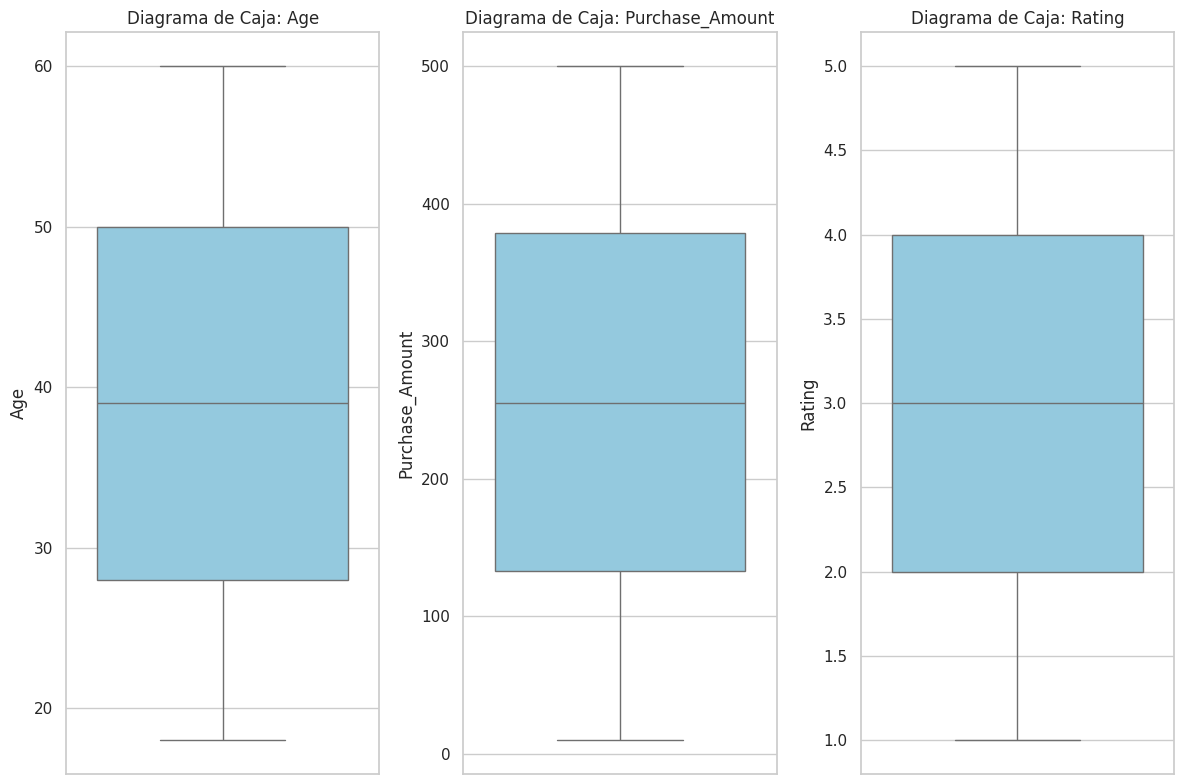

In [65]:
# Visualizar si hay outliers

# Seleccionar únicamente las columnas numéricas
numerical_columns = dato.select_dtypes(include=['number']).columns

# Crear un diagrama de caja (boxplot) para cada columna numérica
plt.figure(figsize=(12, 8))  # Ajustar el tamaño de la figura
for i, col in enumerate(numerical_columns, start=1):
    plt.subplot(1, len(numerical_columns), i)
    sns.boxplot(y=dato[col], color='skyblue')
    plt.title(f'Diagrama de Caja: {col}')
    plt.ylabel(col)
    plt.tight_layout()  # Ajustar las subtramas

plt.show()


Observacion:

Bigote del grafico, representa el rango intercuartilico (IQR) extendido en 1.5 veces. Los valores que se encuentra fuera de este rango son considerado Outliers

### 4.1.1.10 Codificación de variables Booleanos

In [66]:
# Estandarizar valores en columnas booleanas (Sí/No)
dato['Repeat_Customer'] = dato['Repeat_Customer'].replace({'YES': 1, 'NO': 0})
dato['Discount_Applied'] = dato['Discount_Applied'].replace({'YES': 1, 'NO': 0})
print(f"Repeat_Customer: {dato['Repeat_Customer'].unique()}")
print(f"Discount_Applied: {dato['Discount_Applied'].unique()}")


Repeat_Customer: [1 0]
Discount_Applied: [0 1]


<ipython-input-66-588f42b13a3c>:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dato['Repeat_Customer'] = dato['Repeat_Customer'].replace({'YES': 1, 'NO': 0})
<ipython-input-66-588f42b13a3c>:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  dato['Discount_Applied'] = dato['Discount_Applied'].replace({'YES': 1, 'NO': 0})


###4.1.1.11 Agregar la columna rango de edad

In [67]:
# Crear una Columna Rango_edad , para esto defino una función para clasificar las edades por rangos
def clasificar_rango_edad(edad):
    if edad < 18:
        return 'Menor de edad'
    elif 18 <= edad < 30:
        return '18-29 años'
    elif 30 <= edad < 45:
        return '30-44 años'
    elif 45 <= edad < 60:
        return '45-59 años'
    else:
        return '60 años o más'


In [68]:
# Aplicar la función al dataset y crear una nueva columna
dato['Rango_Edad'] = dato['Age'].apply(clasificar_rango_edad)

In [69]:
# Verificar la nueva columna
print(dato[['Age', 'Rango_Edad']].head())

   Age  Rango_Edad
0   49  45-59 años
1   36  30-44 años
2   52  45-59 años
3   47  45-59 años
4   43  30-44 años


### 4.1.1.12: Agregar la columna rango de gasto


In [70]:
# Crear una Columna Rango_gasto , para esto defino una función para clasificar las edades por rangos
def clasificar_rango_gasto(gasto):
   if gasto < 50:
        return 'Menor de 50'
   elif 50 <= gasto < 100:
        return '50-100'
   elif 100<= gasto <200:
        return '100-200'
   elif 200 <= gasto < 300:
        return '200-300'
   elif 300 <= gasto < 400:
        return '300-400'
   elif 400 <= gasto < 500:
        return '400-500'
   else:
        return 'mas de 500'


In [71]:
# Aplicar la funcion en el dataset y crear la columna nueva
dato['Rango_gasto']=dato['Purchase_Amount'].apply(clasificar_rango_gasto)
dato[['Rango_gasto','Purchase_Amount']].head()

,Rango_gasto,Purchase_Amount
0,200-300,253.26
1,50-100,73.19
2,100-200,125.62
3,400-500,450.32
4,300-400,369.28


## 4.2 Analisis exploratorio de los datos

## Analisis univariante

### 4.2.1 Distribucion de los clientes por rango de edad.

In [72]:
#Distribucion de los clientes por Rango de Edad

In [73]:
# Visualizar la edad promedio
print(f"Edad promedio: {dato['Age'].mean():.2f}")

Edad promedio: 38.95


In [90]:
# Utilizar la estadistica descriptiva Edad
dato['Age'].describe()

,Age
count,50000.000000
mean,38.945220
std,12.398137
min,18.000000
25%,28.000000
50%,39.000000
75%,50.000000
max,60.000000


<Axes: xlabel='Age'>

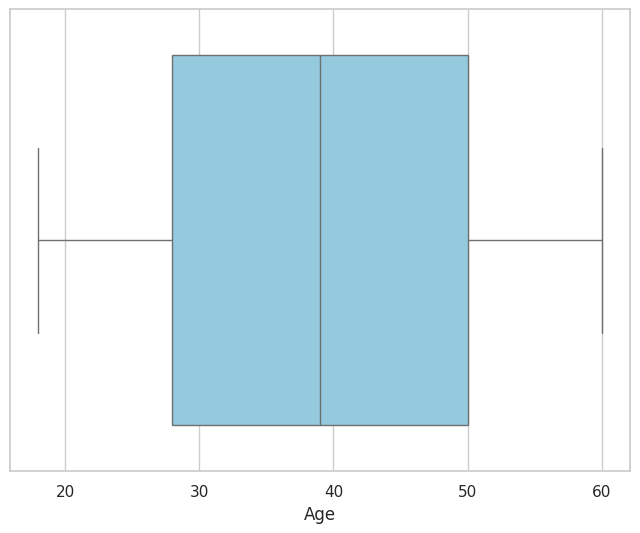

In [91]:
# Visualizamos un diagrama de Caja para la edad
plt.figure(figsize=(8, 6))
sns.boxplot(x=dato['Age'], color='skyblue')

Observacion: El análisis del gráfico de caja muestra que el 50% de los clientes, se concentran en el rango intercuartílico, que va desde 28(Q1) hasta los 50 añoss (Q3). Este rango refleja la mayoría de los valores típicos de edad de los clientes. Esto sugiere que la mayor parte de las de la edad de los clientes que han realizado compras se encuentran dentro de estos límites."

In [74]:
#Ordenar los datos de la columna 'Rango_edad'de forma ascendente y contar el numero de casos
frecuencia=dato['Rango_Edad'].value_counts().sort_index()
print(frecuencia)


Rango_Edad
18-29 años       14030
30-44 años       17456
45-59 años       17363
60 años o más     1151
Name: count, dtype: int64


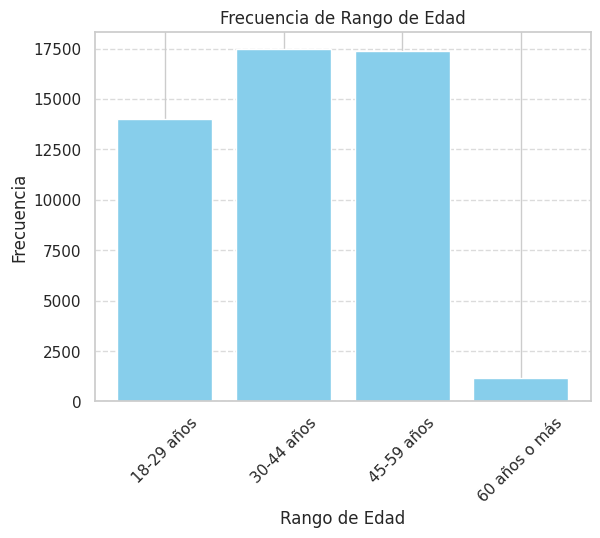

In [75]:
# Crear un Gráfico de barra para la frecuencia Rango de edad
plt.bar(frecuencia.index, frecuencia.values,color='skyblue')
# PErsonalizar el grafico
plt.xlabel('Rango de Edad')
plt.ylabel('Frecuencia')
plt.title('Frecuencia de Rango de Edad')
plt.xticks(rotation=45)  # Rotar etiquetas si son largas
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()



Se observa que los rangos con mayor frecuencia corresponden a las edades de 30 - 44 años y de 45-59 años

### 4.2.2 Distribucion del Importe del Gasto

In [76]:
#Visualizar el promedio del gasto
print(f"Gasto promedio: {dato['Purchase_Amount'].mean():.2f}")

Gasto promedio: 255.53


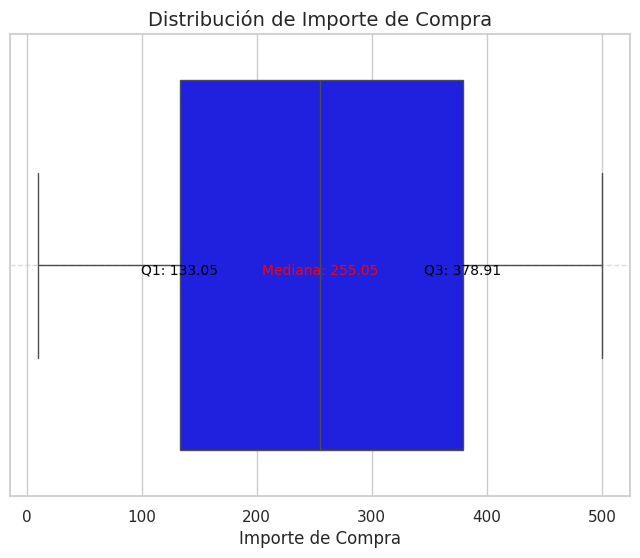

In [77]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Crear el gráfico de caja
plt.figure(figsize=(8, 6))  # Ajustar el tamaño del gráfico
sns.boxplot(x=dato['Purchase_Amount'], color='Blue')
#Calcular los cuartiles
# Calcular los cuartiles
q1 = dato['Purchase_Amount'].quantile(0.25)
q2 = dato['Purchase_Amount'].quantile(0.50)  # Mediana
q3 = dato['Purchase_Amount'].quantile(0.75)

# Agregar los cuartiles al gráfico:
plt.text(q1, 0.02, f'Q1: {q1:.2f}', color='black', fontsize=10, ha='center')
plt.text(q2, 0.02, f'Mediana: {q2:.2f}', color='red', fontsize=10, ha='center')
plt.text(q3, 0.02, f'Q3: {q3:.2f}', color='black', fontsize=10, ha='center')

# Personalizar el gráfico
plt.title('Distribución de Importe de Compra', fontsize=14)
plt.xlabel('Importe de Compra', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

Oservacion:
El análisis del gráfico de caja muestra que el 50% de los importes de gastos se concentran en el rango intercuartílico, que va desde 133 (Q1) hasta 378.91 dólares (Q3). Este rango refleja la mayoría de los valores típicos de gasto realizados por los clientes. Esto sugiere que la mayor parte de las compras realizadas por los clientes se encuentran dentro de estos límites, representando comportamientos comunes de gasto."

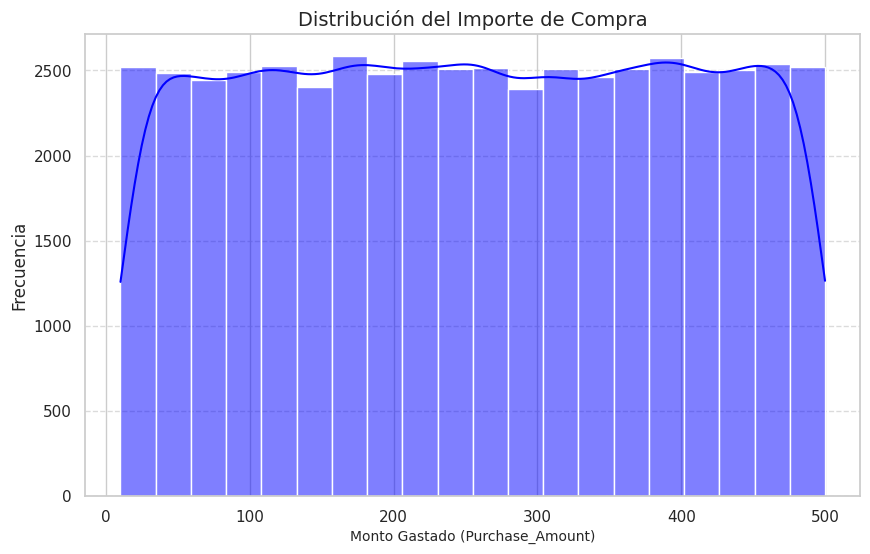

In [78]:
# visualizar Purchase_Amount por medio de un histograma
plt.figure(figsize=(10, 6))
sns.histplot(dato['Purchase_Amount'], bins=20, color='blue', kde=True)  # kde=True para mostrar la línea de densidad
plt.title('Distribución del Importe de Compra', fontsize=14)
plt.xlabel('Monto Gastado (Purchase_Amount)', fontsize=10)
plt.ylabel('Frecuencia', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

observación
La mayor concentración de gastos parece estar cerca de los valores intermedios del rango, disminuyendo progresivamente hacia los extremos, lo que indica que la mayoría de las compras se encuentran en un monto moderado.

### 4.2.3 Distribucion de las compras por categorías

In [79]:
# frecuencia de compra por categoria
frequencia=dato['Category'].value_counts()
print(frequencia)

Category
ELECTRONICS    12642
HOME           12492
BEAUTY         12447
CLOTHING       12419
Name: count, dtype: int64


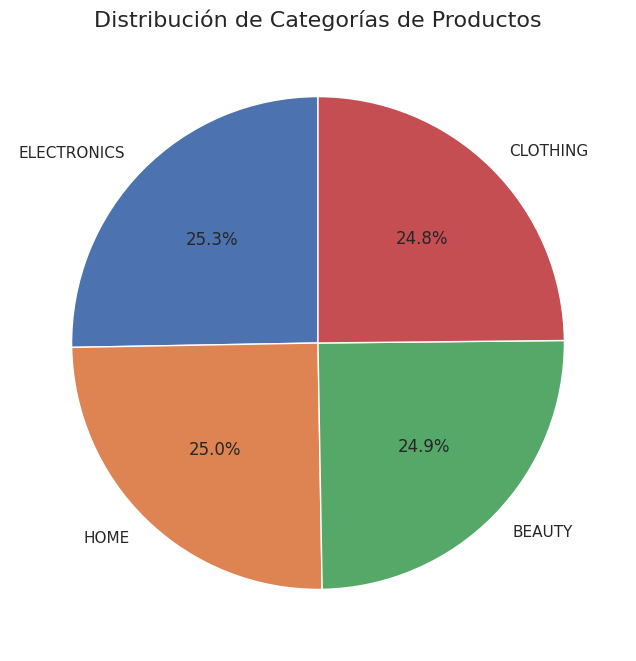

In [80]:
# Configurar el estilo de los gráficos
sns.set(style="whitegrid")

# Contar la frecuencia de cada categoría
frecuencias = dato['Category'].value_counts()

# Crear el gráfico de pie
plt.figure(figsize=(8, 8))
plt.pie(frecuencias.values, labels=frecuencias.index, autopct='%1.1f%%', startangle=90,)

# Personalizar el gráfico
plt.title('Distribución de Categorías de Productos', fontsize=16)

# Mostrar el gráfico
plt.show()

### 4.2.4 Distribucion promedio de las compras por categorías

In [96]:
# agrupar el importe de compra promedio por categoria
promedio = dato.groupby('Category')['Purchase_Amount'].mean()
# Ordenar el promedio de mayor a menor
promedio = promedio.sort_values(ascending=False)
promedio

,Purchase_Amount
Category,
ELECTRONICS,257.925019
HOME,255.781101
BEAUTY,255.059685
CLOTHING,253.319750


<ipython-input-97-35d67f1e89e6>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promedio.values, y=promedio.index, palette='viridis', orient='h')


<Figure size 1000x600 with 0 Axes>

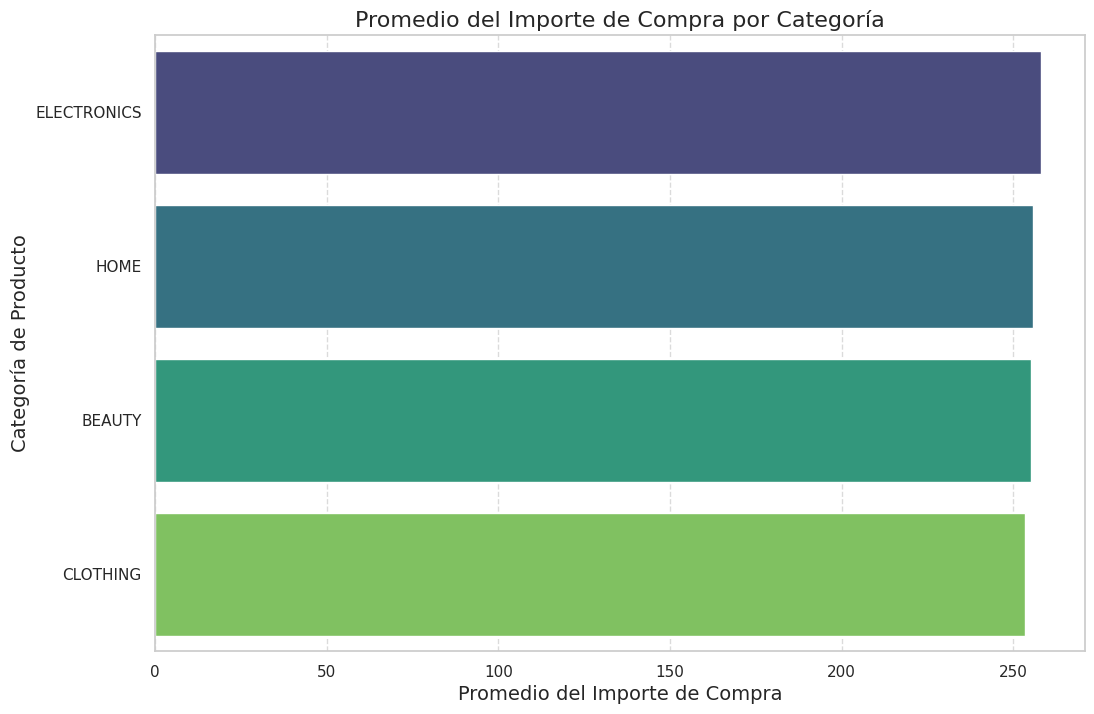

In [97]:
# Calcular el promedio del importe de compra por categoría
# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.figure(figsize=(12, 8))
sns.barplot(x=promedio.values, y=promedio.index, palette='viridis', orient='h')
# Personalizar el gráfico
plt.title('Promedio del Importe de Compra por Categoría', fontsize=16)
plt.xlabel('Promedio del Importe de Compra', fontsize=14)
plt.ylabel('Categoría de Producto', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


Observacion : El análisis muestra que los productos electrónicos tienen la mayor preferencia entre las categorías de compra, destacándose como la opción más popular entre los clientes."

###4.2.5 Diagrama de caja de los importe por categoría

<ipython-input-98-1db9aacf7d35>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='Category', y='Purchase_Amount', data=dato, palette='viridis')


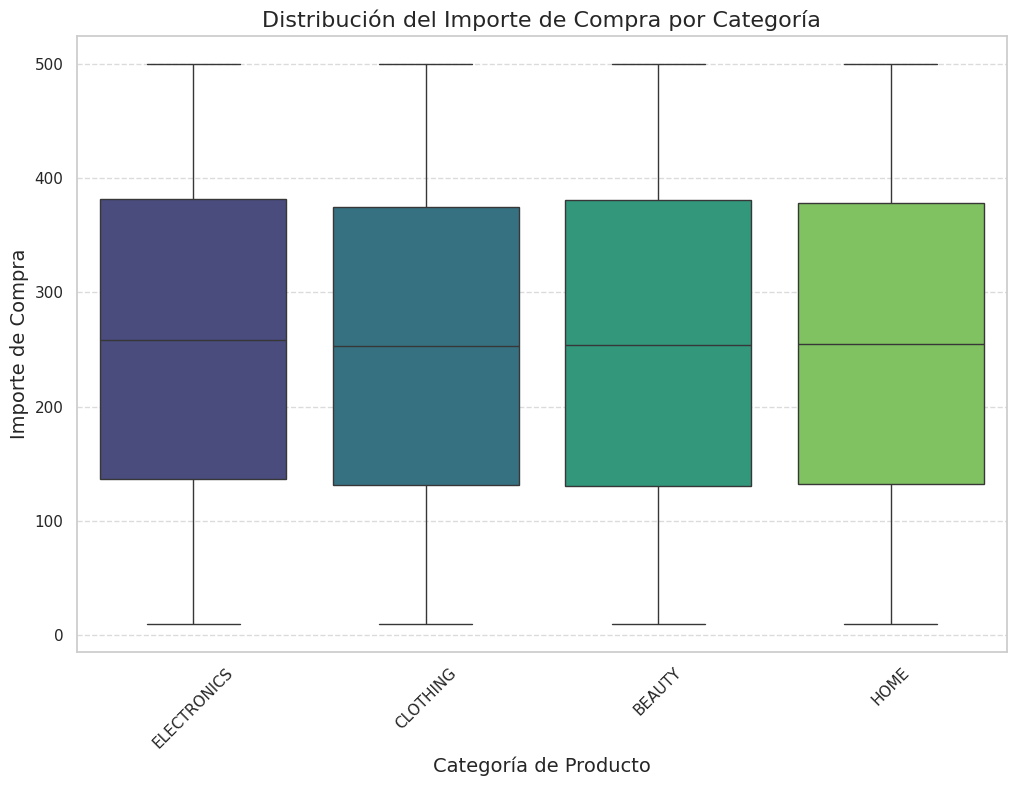

In [98]:
# Configurar el estilo del gráfico
sns.set(style="whitegrid")

# Crear el gráfico de caja
plt.figure(figsize=(12, 8))
sns.boxplot(x='Category', y='Purchase_Amount', data=dato, palette='viridis')

# Personalizar el gráfico
plt.title('Distribución del Importe de Compra por Categoría', fontsize=16)
plt.xlabel('Categoría de Producto', fontsize=14)
plt.ylabel('Importe de Compra', fontsize=14)
plt.xticks(rotation=45)  # Rotar las etiquetas para mayor claridad
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

4.2.6 Capacidad del cliente para continuar realizando compras a pesar de cambios en descuentos

In [84]:
# Calcular la proporción de clientes resilientes por descuento aplicado
resiliencia = dato.groupby('Discount_Applied')['Repeat_Customer'].mean()
resiliencia

,Repeat_Customer
Discount_Applied,
0,0.503318
1,0.506445


<ipython-input-85-c4c3b59e8dfc>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resiliencia.index, y=resiliencia.values, palette='mako')


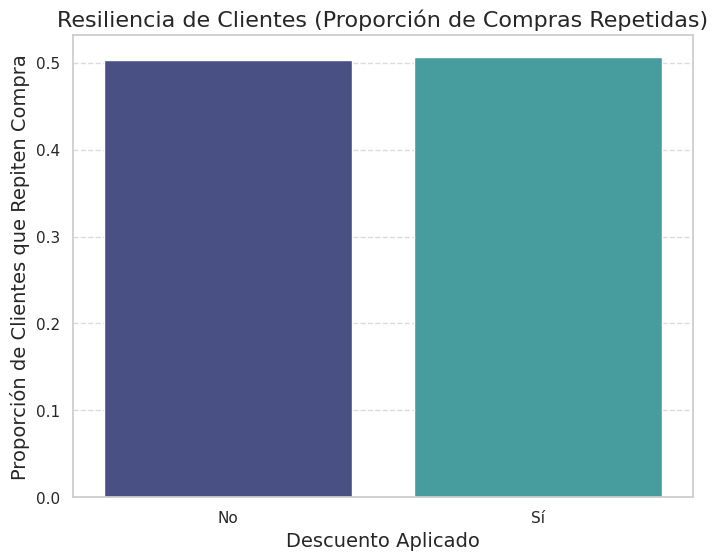

In [85]:
# Calcular la proporción de clientes resilientes por descuento aplicado
resiliencia = dato.groupby('Discount_Applied')['Repeat_Customer'].mean()

# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=resiliencia.index, y=resiliencia.values, palette='mako')

# Personalizar el gráfico
plt.title('Resiliencia de Clientes (Proporción de Compras Repetidas)', fontsize=16)
plt.xlabel('Descuento Aplicado', fontsize=14)
plt.ylabel('Proporción de Clientes que Repiten Compra', fontsize=14)
plt.xticks(ticks=[0, 1], labels=['No', 'Sí'])  # Etiquetas para los valores de descuento
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

###4.2.6 Capacidad del cliente para continuar realizando compras en funcion al metodo de pago

In [99]:
# Calcular la proporción de clientes resilientes por método de pago
resiliencia_metodo_pago = dato.groupby('Payment_Method')['Repeat_Customer'].mean()
# Ordenar el promedio de mayor a menor
resiliencia_metodo_pago = resiliencia_metodo_pago.sort_values(ascending=False)
resiliencia_metodo_pago

,Repeat_Customer
Payment_Method,
CREDIT CARD,0.511095
UPI,0.509244
CASH ON DELIVERY,0.502481
DEBIT CARD,0.496783


<ipython-input-100-03fb6fce5751>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=resiliencia_metodo_pago.values, y=resiliencia_metodo_pago.index, palette='viridis')


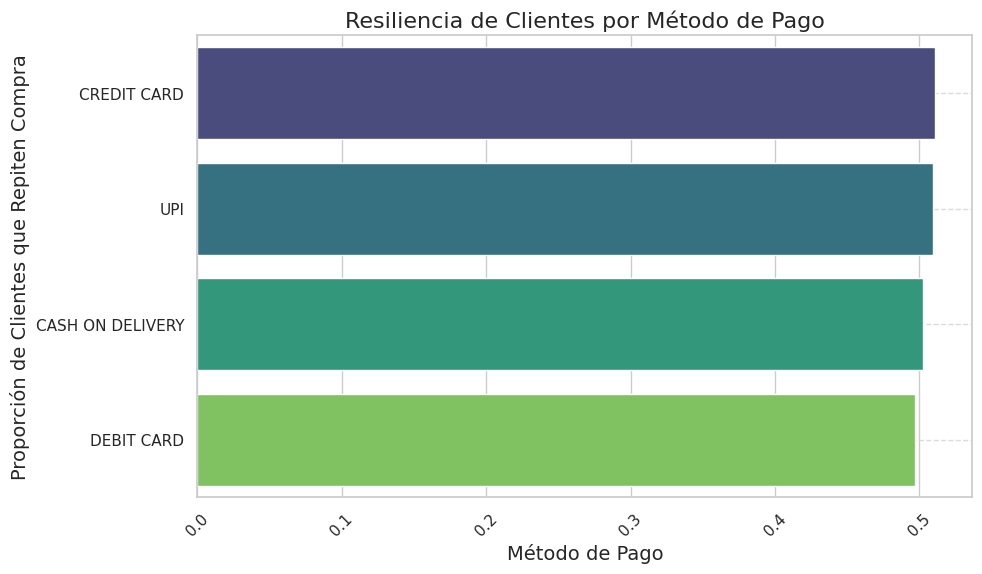

In [100]:

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(x=resiliencia_metodo_pago.values, y=resiliencia_metodo_pago.index, palette='viridis')

# Personalizar el gráfico
plt.title('Resiliencia de Clientes por Método de Pago', fontsize=16)
plt.xlabel('Método de Pago', fontsize=14)
plt.ylabel('Proporción de Clientes que Repiten Compra', fontsize=14)
plt.xticks(rotation=45)  # Rotar etiquetas si son largas
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show();


###4.2.7 Distribucion de las compra por productos

In [101]:
#grafico de los prouductos
frecuencia_productos = dato['Product_Name'].value_counts().head(10)
# ordenar de mayor a menor
frecuencia_productos = frecuencia_productos.sort_values(ascending=False)
frecuencia_productos

,count
Product_Name,
HEADPHONES,3261
T-SHIRT,3206
SMARTWATCH,3177
FACE CREAM,3174
SOFA COVER,3156
COOKWARE,3155
SHAMPOO,3145
LAMP,3138
PERFUME,3116


<ipython-input-102-750f069a676e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=frecuencia_productos.values, y=frecuencia_productos.index, palette='viridis')


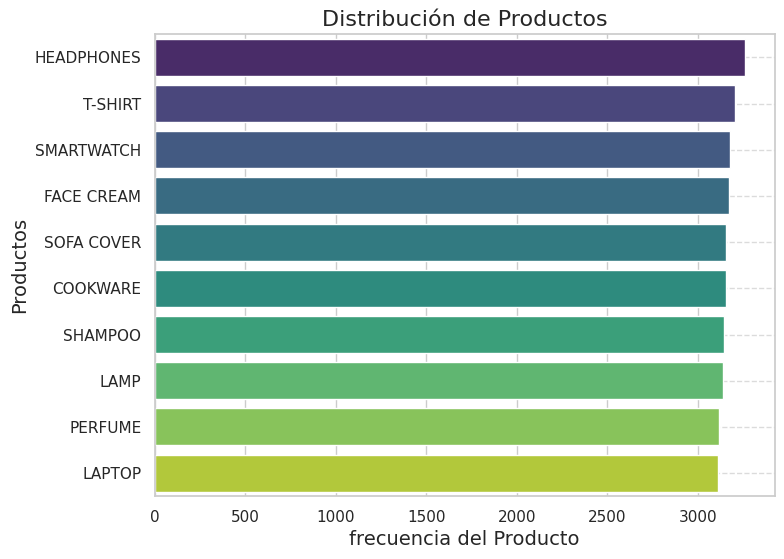

In [102]:
# Crear el gráfico de barras
plt.figure(figsize=(8, 6))
sns.barplot(x=frecuencia_productos.values, y=frecuencia_productos.index, palette='viridis')

# Personalizar el gráfico
plt.title('Distribución de Productos', fontsize=16)
plt.xlabel('frecuencia del Producto', fontsize=14)
plt.ylabel('Productos', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()

observacion: El análisis revela que los productos con mayor preferencia de compra entre los clientes son los audífonos, camisetas y relojes inteligentes, destacándose como los artículos más populares."

## 4.2 Analisis bivariante

### Pregunta: ¿Cuál es el monto promedio de compra por grupo de edad?

In [104]:
# Agrupar 'Purchase_Amount' y 'Rango_Edad'
# Calcular el promedio del monto de compra por grupo de edad
promedio_por_edad = dato.groupby('Rango_Edad')['Purchase_Amount'].mean().sort_values(ascending=False)
promedio_por_edad


,Purchase_Amount
Rango_Edad,
30-44 años,255.634392
45-59 años,255.622479
18-29 años,255.506892
60 años o más,252.930252


<ipython-input-105-147fb5f717b3>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promedio_por_edad.values, y=promedio_por_edad.index, palette='Blues_d', orient='h')


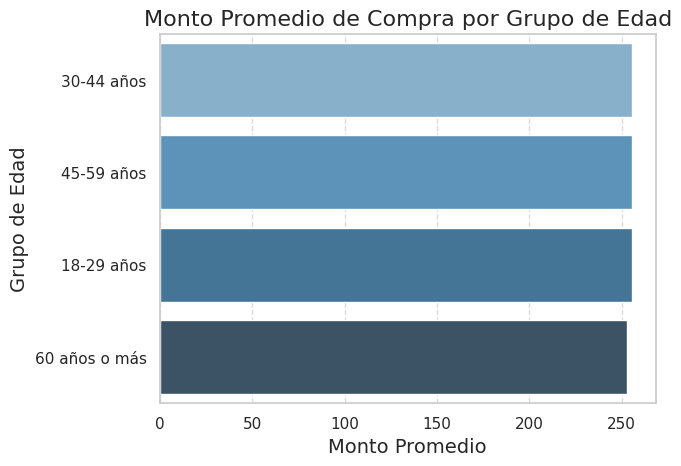

In [105]:
# Gráfico para visualizar los resultados
sns.barplot(x=promedio_por_edad.values, y=promedio_por_edad.index, palette='Blues_d', orient='h')

# Personalizar el gráfico
plt.title('Monto Promedio de Compra por Grupo de Edad', fontsize=16)
plt.xlabel('Monto Promedio', fontsize=14)
plt.ylabel('Grupo de Edad', fontsize=14)
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Mostrar el gráfico
plt.show()


### Pregunta 2: ¿Existen diferencias en los patrones de compra entre hombres y mujeres?

#### Calcular el promedio de compra por genero utilizando la funcion group by ()

In [106]:
# calcular el promedio de compar
promedio_por_genero = dato.groupby('Gender')['Purchase_Amount'].mean()
promedio_por_genero


,Purchase_Amount
Gender,
FEMALE,256.382360
MALE,254.230838
OTHER,255.982589


### visualizamos con un gráfico de barra

<ipython-input-107-cc6528147f32>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=promedio_por_genero.index, y=promedio_por_genero.values, palette='viridis')


Text(0, 0.5, 'Promedio de Compra')

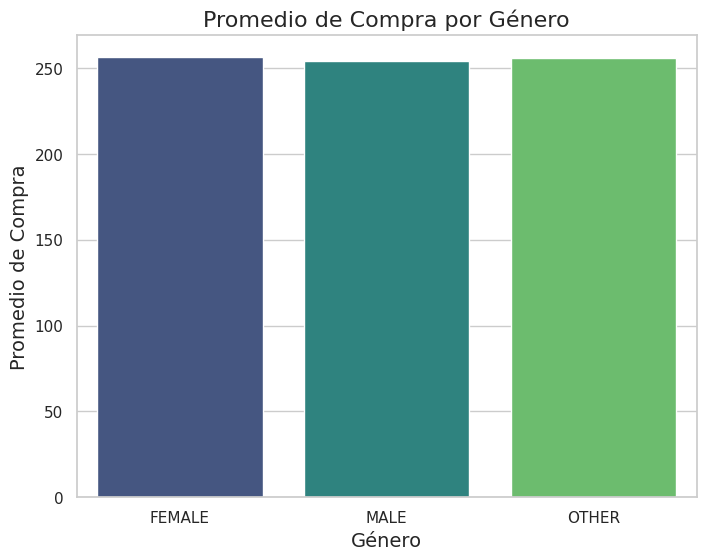

In [107]:
# Grafico de barra
plt.figure(figsize=(8, 6))
sns.barplot(x=promedio_por_genero.index, y=promedio_por_genero.values, palette='viridis')

# Personalizar el gráfico
plt.title('Promedio de Compra por Género', fontsize=16)
plt.xlabel('Género', fontsize=14)
plt.ylabel('Promedio de Compra', fontsize=14)

### Agrupar la distribucion de compra por genero y categoria

In [123]:
#Agrupar por genero y categoria:
categorias_genero = dato.groupby(['Gender', 'Category'])['Purchase_Amount'].sum().unstack()
print(categorias_genero)


Category      BEAUTY    CLOTHING  ELECTRONICS        HOME
Gender                                                   
FEMALE    1076998.27  1058347.36   1049579.57  1072303.88
MALE      1060536.94  1020506.54   1098067.09  1052307.49
OTHER     1037192.69  1067124.08   1113041.43  1070606.14


### Visualizamos el grafico


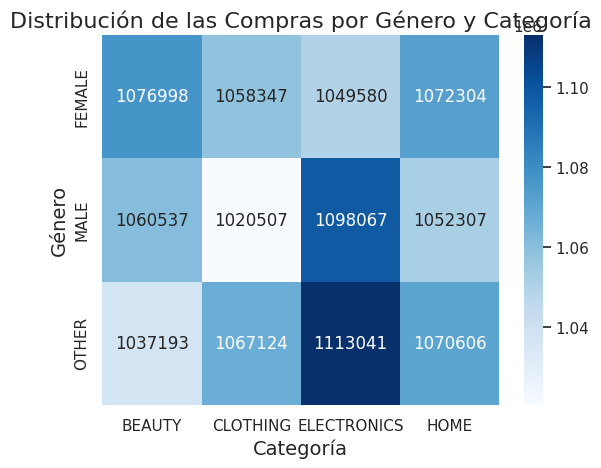

In [124]:
# Visualizacion distribución por categoría
sns.heatmap(categorias_genero, annot=True, cmap='Blues', fmt=".0f")
plt.title('Distribución de las Compras por Género y Categoría', fontsize=16)
plt.xlabel('Categoría', fontsize=14)
plt.ylabel('Género', fontsize=14)
plt.show()

Observacion: los patrones muestran que ciertos productos son más comprados por un género específico, esto podría ayudar en la preferencia en productos o servicios.

### Correlacion: es una herramienta clave en el análisis de datos porque ayuda a identificar la relación entre dos variables. Específicamente, mide cómo una variable cambia en relación con otra.


In [131]:
# correlacion
# seleccionamos las columnas numericas
columnas_numericas = dato.select_dtypes(include=['int64', 'float64'])
# Calcular la matriz de correlación
matriz_correlacion = columnas_numericas.corr()
matriz_correlacion

,Age,Purchase_Amount,Discount_Applied,Rating,Repeat_Customer
Age,1.000000,-0.001436,-0.000434,-0.008402,0.000032
Purchase_Amount,-0.001436,1.000000,0.000305,-0.006648,0.003416
Discount_Applied,-0.000434,0.000305,1.000000,-0.000875,0.003127
Rating,-0.008402,-0.006648,-0.000875,1.000000,-0.004448
Repeat_Customer,0.000032,0.003416,0.003127,-0.004448,1.000000


Observaciones:
1. Muestra una relacion cercano a cero lo que implica que podria existir relaciones no lineales entre variable

2. Es posible que estas variables realmente no tengan ninguna relacion significativa en este contexto
